Projekt PRiAD Testy

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from sklearn.cluster import AgglomerativeClustering

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid

from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [2]:
df = pd.read_csv("UniversalBank.csv")
print(df)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4   1.60          1   
1        2   45          19      34     90089       3   1.50          1   
2        3   39          15      11     94720       1   1.00          1   
3        4   35           9     100     94112       1   2.70          2   
4        5   35           8      45     91330       4   1.00          2   
5        6   37          13      29     92121       4   0.40          2   
6        7   53          27      72     91711       2   1.50          2   
7        8   50          24      22     93943       1   0.30          3   
8        9   35          10      81     90089       3   0.60          2   
9       10   34           9     180     93023       1   8.90          3   
10      11   65          39     105     94710       4   2.40          3   
11      12   29           5      45     90277       3   0.10          2   
12      13   48          

In [3]:
liczbaBrakujacychElementow = df.isnull().sum().sum()
print(f"Liczba brakujących elementów: {liczbaBrakujacychElementow}")

Liczba brakujących elementów: 0


In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
#Liczba obiektów
df.shape[0]

5000

In [7]:
#liczba atrybutów - wyznaczamy personal loan - id nie uwzględniamy bo nie powinno mieć wpływu na wynik pożyczki
df.columns.size

14

In [8]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
df.info()
#prawie wszystkie dane typu int, jedynie ccavg typu float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


## Wnioski z analizy podstawowych parametrów danych:

1. Wszystkie dane w zbiorze są typu liczbowego. Ułatwi to późniejszą analizę zbioru.
2. Kredyt jest udzielany jedynie 9.6% wszystkich osób w zbiorze.
3. 

In [10]:
#Wypisanie ramki danych
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [11]:
#ID niepotrzebna dana, można wyrzucić
df = df.drop(columns=['ID'])

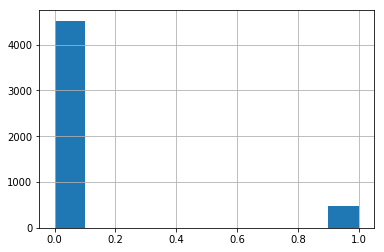

In [12]:
df['Personal Loan'].hist()

LinAlgError: singular matrix

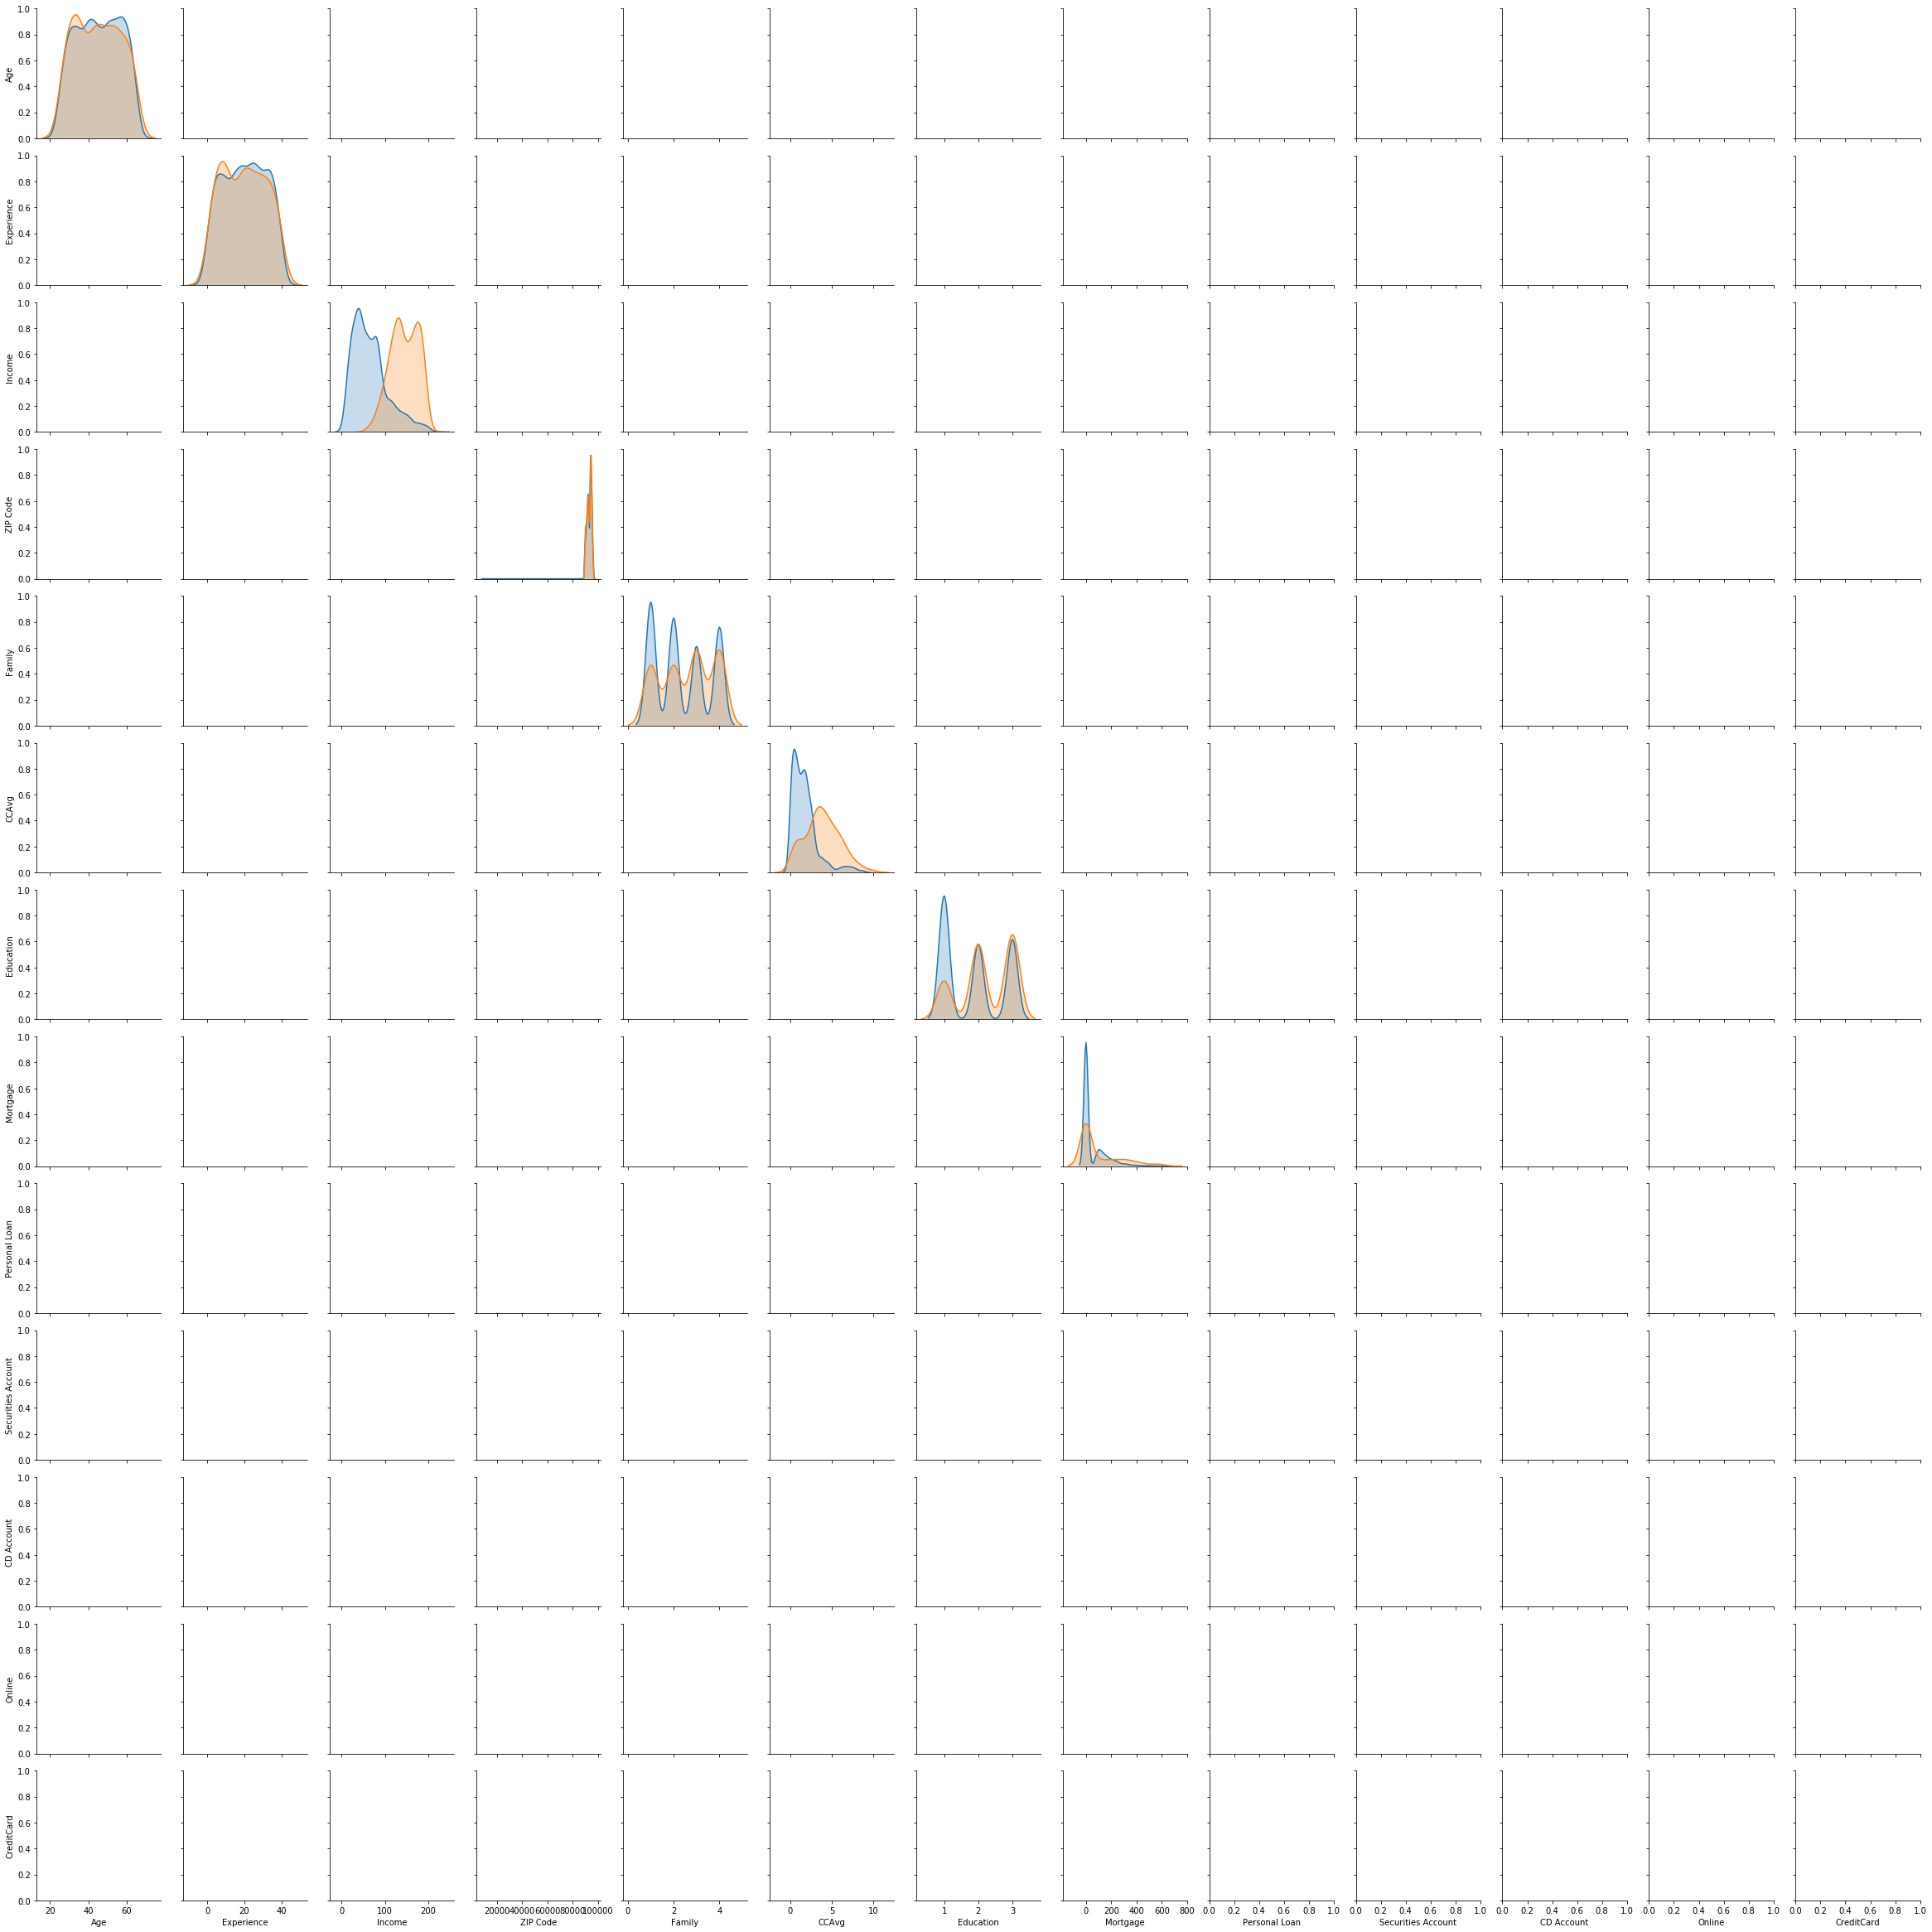

In [13]:
#Wizualizacja wszystkich danych z podziałem na przydział kredytu
sns.pairplot(df, hue='Personal Loan')
plt.show()

In [ ]:
#Korelacja:
plt.figure(figsize=(20,20), dpi = 200)
sns.heatmap(df.corr(), annot = df.corr())

In [ ]:
#korelacja atrybutów z przyznaniem pożyczki
loanCorrelation = df.corr().iloc[8:9 , 0:]

loanCorrelation = loanCorrelation.drop(columns=['Personal Loan'])
plt.figure(figsize = (25, 2), dpi = 200)
sns.heatmap(loanCorrelation, annot = loanCorrelation)

In [ ]:
sortedLoanCorrelation = loanCorrelation.mean()
sortedLoanCorrelation = sortedLoanCorrelation.sort_values(ascending = False)
sortedLoanCorrelation = pd.DataFrame(sortedLoanCorrelation, columns=['Korelacja atrybutów z przydzieleniem kredytu'])

sortedLoanCorrelation

In [ ]:
#Atrybuty znaczące: Income, CCAvg, CD Account, Mortgage, Education, Family(?!)
atrZ = list(list(sortedLoanCorrelation.index[:5]))
dfSkrocone = df[atrZ + [df.columns[8]]]
dfSkrocone.head()
#Wizualizacja danych uwzględniając tylko atrybuty znaczące z podziałem na przydział kredytu
sns.pairplot(dfSkrocone, hue='Personal Loan')
plt.show()

In [ ]:
#Testy klasyfikatorów

In [ ]:
def podziel(df,proporcja):
    # dzieli macierz (ramkę) danych na zbiór uczacy i testowy
    # df - ramka danych; proporcja - proporcja podzialu (0-1)
    # zwraca słownik z kluczami:
    # opis_ucz/opis_test - macierz atrybutów opisujących zbioru uczącego/testowego
    # dec_ucz/dec_test - wektor wartosci atrybutu decyzyjnego zbioru uczącego/testowego
    # uwaga: atrybut opisujący jest zawsze na końcu (ostatnia kolumna ramki)
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}


def weryfikuj(model,dane,atryb):
    # wyswietla wynik weryfikacji klasyfikatora w postaci macierzy pomyłek
    # dla zbioru uczącego i testowego
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atryb - lista atrybutów uwzględnianych w weryfikacji
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    print("Macierz pomyłek dla zbioru uczącego")
    display(pd.crosstab(dane["dec_ucz"],wynik_ucz)) 
    print("Macierz pomyłek dla zbioru testowego")
    display(pd.crosstab(dane["dec_test"],wynik_test)) 

In [ ]:
dane = podziel(dfSkrocone,0.2)
print('Liczba obiektów zbioru uczącego: ', len(dane["opis_ucz"]))
print('Liczba obiektów zbioru testowego: ', len(dane["opis_test"]))


In [23]:
model = GaussianNB()

weryfikuj(model, dane, range(len(atrZ)))

Macierz pomyłek dla zbioru uczącego


col_0,0,1
row_0,,
0,3303,310
1,159,228


Macierz pomyłek dla zbioru testowego


col_0,0,1
row_0,,
0,831,76
1,40,53


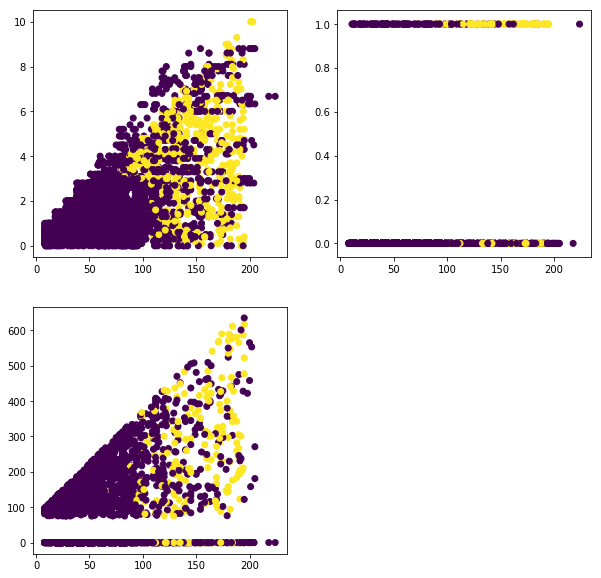

In [24]:
#Grupowanie
df_bezPersonalLoan = df.drop(columns = ['Personal Loan'])
grupy = linkage(df_bezPersonalLoan, method = 'average', metric = 'euclidean')
prog_proc = 70
prog = prog_proc*max(grupy[:,2])/100
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter( x=df_bezPersonalLoan['Income'], y = df_bezPersonalLoan['CCAvg'], c=df['Personal Loan'])
plt.subplot(2,2,2)
plt.scatter( x=df_bezPersonalLoan['Income'], y = df_bezPersonalLoan['CD Account'], c=df['Personal Loan'])
plt.subplot(2,2,3)
plt.scatter( x=df_bezPersonalLoan['Income'], y = df_bezPersonalLoan['Mortgage'], c=df['Personal Loan'])




grupa             0  1
Personal Loan         
0              4519  1
1               480  0


Text(0.5, 1.0, 'macierz pomyłek')

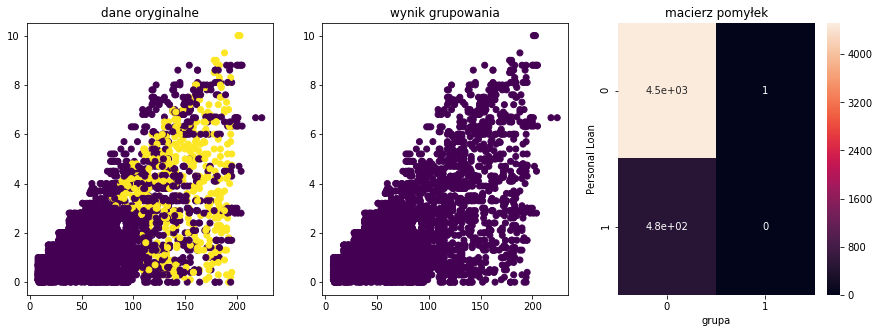

In [25]:
#Naturalne przyporządkowanie obiektów -> porównanie 
ile_grup = 2
df_org = pd.read_csv("UniversalBank.csv")
df = df_org.drop(columns = ['Personal Loan'])

model = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=ile_grup)
model.fit(df)

personalLoan = df_org['Personal Loan']
grupa = model.labels_

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter( x=df_org['Income'], y=df_org['CCAvg'], c=personalLoan)
plt.title('dane oryginalne')
plt.subplot(1,3,2)
df['grupa']=  model.labels_
plt.scatter( x=df['Income'], y=df['CCAvg'], c=grupa)
plt.title('wynik grupowania')
plt.subplot(1,3,3)
pomylki = pd.crosstab(df_org['Personal Loan'],df['grupa'])
print(pomylki)
sns.heatmap(pomylki,annot = pomylki)
plt.title('macierz pomyłek')

#Takie grupowanie do kitu i bez sensu
#Trzeba stestować metodę k- średnich


grupa             0     1
Personal Loan            
0              2059  2461
1               220   260


Text(0.5, 1.0, 'macierz pomyłek')

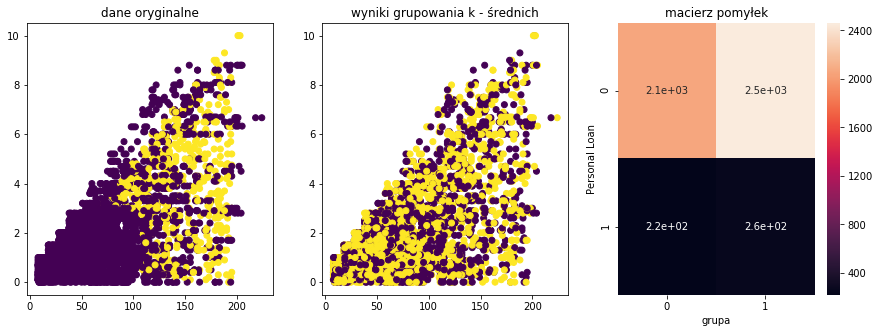

In [26]:
#Grupowanie k - średnich
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

k = 2
df_org = pd.read_csv("UniversalBank.csv")
df = df_org.drop(columns = ['Personal Loan'])
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(df)
etykiety_klastrow = kmeans.fit_predict(df)
personalLoan = df_org['Personal Loan']

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter( x=df_org['Income'], y=df_org['CCAvg'], c=personalLoan)
plt.title('dane oryginalne')
#plt.figure(figsize=(5,5))
plt.subplot(1,3,2)
plt.scatter(x=df['Income'], y=df['CCAvg'], marker='o', c=etykiety_klastrow)
plt.title('wyniki grupowania k - średnich')
#plt.scatter( x=df['Income'], y=df['CCAvg'], c=etykiety_klastrow)

df['grupa'] = etykiety_klastrow
plt.subplot(1,3,3)
pomylki = pd.crosstab(df_org['Personal Loan'],df['grupa'])

print(pomylki)
sns.heatmap(pomylki,annot = pomylki)
plt.title('macierz pomyłek')

#Tu już trochę lepiej, przynajmniej coś się podzieliło 
#Porównanie w macierzy pomyłek
#Tak nie bardzo to przypisało odpowiednio 

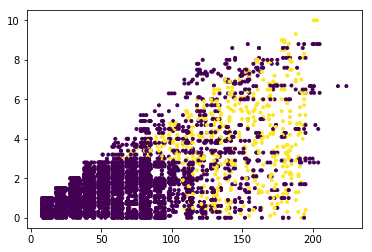

In [62]:
#Klasyfikator najbliższego sąsiada
df_org = pd.read_csv("UniversalBank.csv")

atrZ = list(list(sortedLoanCorrelation.index[:5]))
dfSkrocone = df_org[atrZ + [df_org.columns[9]]]
dfSkrocone.head()

plt.scatter(x=dfSkrocone.loc[:, 'Income'], y=dfSkrocone.loc[:, 'CCAvg'], c=dfSkrocone['Personal Loan'], marker = '.')
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree')
nbrs.fit(dfSkrocone[['Income','CCAvg']])
distances, indices = nbrs.kneighbors(dfSkrocone[['Income','CCAvg']])

In [63]:
nbrs_wynik = pd.DataFrame({'Income':df_org.loc[:, 'Income'],
                           'CCAvg':df_org.loc[:, 'CCAvg'],
                           'Najbliższy': indices[:,1],
                           'Odlegość od najbl.': distances[:,1],
                           'Drugi najbl.': indices[:,2],
                           'Odlegość od drugiego': distances[:,2]})
nbrs_wynik.head(20)

,Income,CCAvg,Najbliższy,Odlegość od najbl.,Drugi najbl.,Odlegość od drugiego
0,49,1.6,0,0.0,996,0.070000
1,34,1.5,4281,0.0,380,0.000000
2,11,1.0,2132,0.0,1979,0.000000
3,100,2.7,3748,0.0,388,0.700000
4,45,1.0,3585,0.0,4,0.000000
5,29,0.4,3670,0.0,25,0.100000
6,72,1.5,2386,0.1,4667,0.100000
7,22,0.3,2929,0.0,4076,0.000000
8,81,0.6,35,0.1,1155,0.200000
9,180,8.9,1339,0.1,614,0.300000


In [64]:
def podziel(df,proporcja):
    # dzieli macierz (ramkę) danych na zbiór uczacy i testowy
    # df - ramka danych; proporcja - proporcja podzialu (0-1)
    # zwraca słownik z kluczami:
    # opis_ucz/opis_test - macierz atrybutów opisujących zbioru uczącego/testowego
    # dec_ucz/dec_test - wektor wartosci atrybutu decyzyjnego zbioru uczącego/testowego
    # uwaga: atrybut opisujący jest zawsze na końcu (ostatnia kolumna ramki)
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

dane = podziel(df_org,0.3)
print('Liczba obiektów zbioru uczącego: ', len(dane["opis_ucz"]))
print('Liczba obiektów zbioru testowego: ', len(dane["opis_test"]))

Liczba obiektów zbioru uczącego:  3500
Liczba obiektów zbioru testowego:  1500


In [66]:
#Model klasyfikatora najbliższego sąsiada
model = KNeighborsClassifier(n_neighbors=1)

In [102]:
def weryfikuj(model,dane,atryb):
    # wyswietla wynik weryfikacji klasyfikatora w postaci macierzy pomyłek
    # dla zbioru uczącego i testowego
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atryb - lista atrybutów uwzględnianych w weryfikacji
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    tabUcz = pd.crosstab(dane["dec_ucz"],wynik_ucz)
    tabTest = pd.crosstab(dane["dec_test"],wynik_test)
    
    print(tabUcz.info())
    
    accUcz = (tabUcz.iloc[0,0] + tabUcz.iloc[1,1])/(len(dane["opis_ucz"]))
    errUcz = (tabUcz.iloc[0,1] + tabUcz.iloc[1,0])/(len(dane["opis_ucz"]))
    accTest = (tabTest.iloc[0,0] + tabTest.iloc[1,1])/(len(dane["opis_test"]))
    errTest = (tabTest.iloc[0,1] + tabTest.iloc[1,0])/(len(dane["opis_test"]))
    print("Macierz pomyłek dla zbioru uczącego")
    print(pd.crosstab(dane["dec_ucz"],wynik_ucz)) 
    print("Jakość klasyfikacji dla zbioru uczącego:" + str(accUcz))
    print("Poziom błędu dla zbioru uczącego:" + str(errUcz))
    print("Macierz pomyłek dla zbioru testowego")
    print(pd.crosstab(dane["dec_test"],wynik_test)) 
    print("Jakość klasyfikacji dla zbioru testowego:" + str(accTest))
    print("Poziom błędu dla zbioru testowego:" + str(errTest))

In [68]:
def granice(model,dane,atr_x, atr_y,tytul,kontur = 1):
    # wyswietla granice decyzyjne
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atr_x/atr_y - artybut wyswietlany na osi x/y
    # tytul - wyswietlany tytul wykresu
    # kontur - par. opcjonalny (=0 -> brak konturu)
    if (kontur == 1):    
        model.fit(dane["opis_ucz"].iloc[:,[atr_x,atr_y]], dane["dec_ucz"])
        x_min = min(dane["opis_ucz"].iloc[:, atr_x].min(),dane["opis_test"].iloc[:, atr_x].min())
        x_max = max(dane["opis_ucz"].iloc[:, atr_x].max(),dane["opis_test"].iloc[:, atr_x].max())
        y_min = min(dane["opis_ucz"].iloc[:, atr_y].min(),dane["opis_test"].iloc[:, atr_y].min())
        y_max = max(dane["opis_ucz"].iloc[:, atr_y].max(),dane["opis_test"].iloc[:, atr_y].max())
        rozst_x = x_max - x_min
        rozst_y = y_max - y_min
        x_min = x_min - 0.1*rozst_x
        x_max = x_max + 0.1*rozst_x
        y_min = y_min - 0.1*rozst_y
        y_max = y_max + 0.1*rozst_y       
        xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/150),
                     np.arange(y_min, y_max, (y_max-y_min)/150))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    plt.figure(dpi = 100)
    plt.title(tytul)
    if (kontur == 1):
        plt.contourf(xx, yy, Z, levels = 4, alpha=0.2)
    plt.scatter(dane["opis_ucz"].iloc[:, atr_x], dane["opis_ucz"].iloc[:, atr_y], c=dane["dec_ucz"], marker = '.')
    plt.scatter(dane["opis_test"].iloc[:, atr_x], dane["opis_test"].iloc[:, atr_y], c=dane["dec_test"], marker = 'x')

In [69]:
#Badanie klasyfikatorów

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 2 columns):
0    2 non-null int64
1    2 non-null int64
dtypes: int64(2)
memory usage: 48.0 bytes
None
Macierz pomyłek dla zbioru uczącego
col_0     0    1
row_0           
0      3144   12
1        18  326
Jakość klasyfikacji dla zbioru uczącego:0.9914285714285714
Poziom błędu dla zbioru uczącego:0.008571428571428572
Macierz pomyłek dla zbioru testowego
col_0     0   1
row_0          
0      1300  64
1        75  61
Jakość klasyfikacji dla zbioru testowego:0.9073333333333333
Poziom błędu dla zbioru testowego:0.09266666666666666


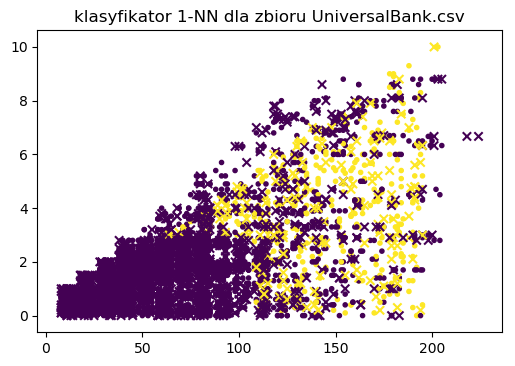

In [103]:
#Klasyfikator 1NN
nazwa_pliku = 'UniversalBank.csv'
# wczytanie badanego zbioru danych
df_org = pd.read_csv(nazwa_pliku)
atrZ = list(list(sortedLoanCorrelation.index[:5]))
dfSkrocone = df_org[atrZ + [df_org.columns[9]]]
# podział zbioru danych
d = podziel(dfSkrocone,0.3)
# zdefiniowanie modelu klasyfikatora
model = KNeighborsClassifier(n_neighbors=1)
# wybór atrybutów
ax, ay = 0,1
# granice dycyzyjne
granice(0,d,0,1,"klasyfikator 1-NN dla zbioru " + nazwa_pliku,0)
# weryfikacja
weryfikuj(model,d,[ax,ay])

In [1]:
#Klasyfikator k-NN

for k in [1,3,5,9]:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    granice(model_knn,d,0,1,"klasyfikator " + str(k)+ "-NN dla zbioru " + nazwa_pliku)
    weryfikuj(model_knn,d,[ax,ay])

NameError: name 'KNeighborsClassifier' is not defined

Text(0, 0.5, 'Prawdopodobienstwo bledu')

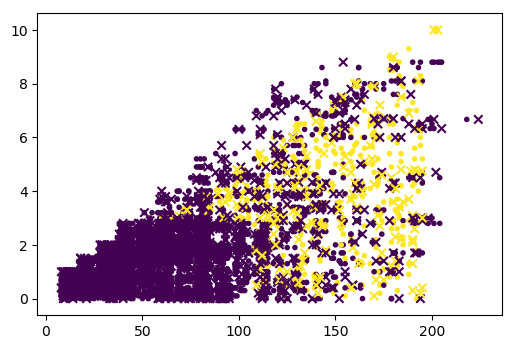

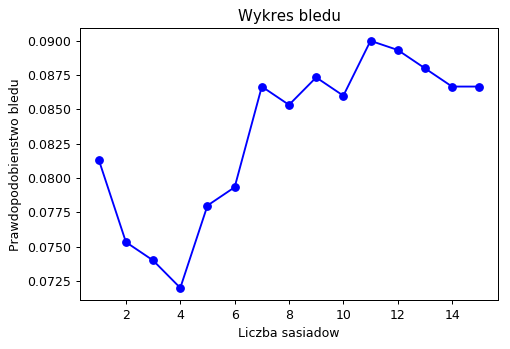

In [76]:
#Analiza błędu klasyfikacji dla k-NN
granice(model,d,0,1,"",0)
kvals = range(1, 16)
rss_all = np.zeros(15)
for k in kvals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(d['opis_ucz'],d['dec_ucz'])
    predictions = model.predict(d['opis_test'])
    rss_all[k-1] = 1-model.score(d['opis_test'],d['dec_test'])
plt.figure(dpi=90)
plt.plot(kvals, rss_all,'bo-')
plt.title('Wykres bledu')
plt.xlabel('Liczba sasiadow')
plt.ylabel('Prawdopodobienstwo bledu')

#Najniższy błąd dla liczby sąsiadów równe 4

Macierz pomyłek dla zbioru uczącego
col_0     0    1
row_0           
0      2690  472
1        44  294
Macierz pomyłek dla zbioru testowego
col_0     0    1
row_0           
0      1131  227
1        14  128


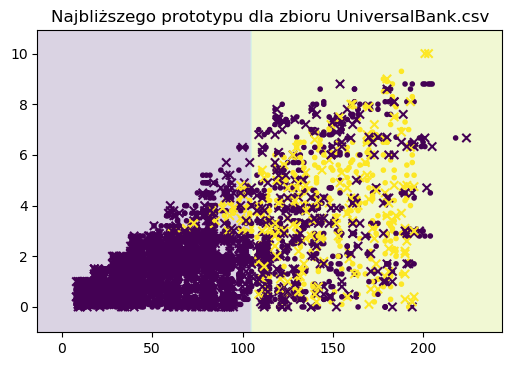

In [77]:
#Metoda najbliższych prototypów
model = NearestCentroid()
# granice dycyzyjne
granice(model,d,0,1,"Najbliższego prototypu dla zbioru " + nazwa_pliku)
# weryfikacja
weryfikuj(model,d,[0,1])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 2 columns):
0    2 non-null int64
1    2 non-null int64
dtypes: int64(2)
memory usage: 48.0 bytes
None
Macierz pomyłek dla zbioru uczącego
col_0     0    1
row_0           
0      2924  232
1       142  202
Jakość klasyfikacji dla zbioru uczącego:0.8931428571428571
Poziom błędu dla zbioru uczącego:0.10685714285714286
Macierz pomyłek dla zbioru testowego
col_0     0    1
row_0           
0      1257  107
1        61   75
Jakość klasyfikacji dla zbioru testowego:0.888
Poziom błędu dla zbioru testowego:0.112


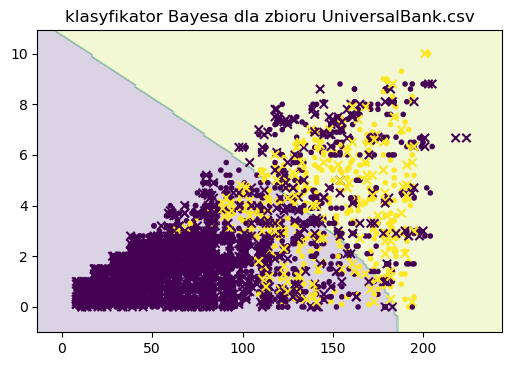

In [104]:
#Naiwny klasyfikator Bayesa
model = GaussianNB()
# granice dycyzyjne
granice(model,d,0,1,"klasyfikator Bayesa dla zbioru " + nazwa_pliku)
# weryfikacja
weryfikuj(model,d,[0,1])

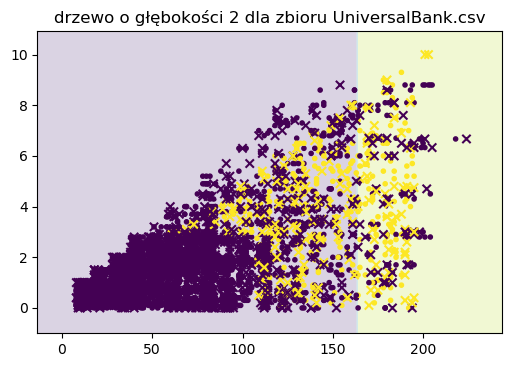

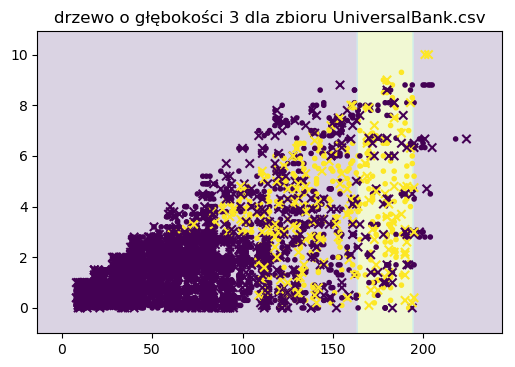

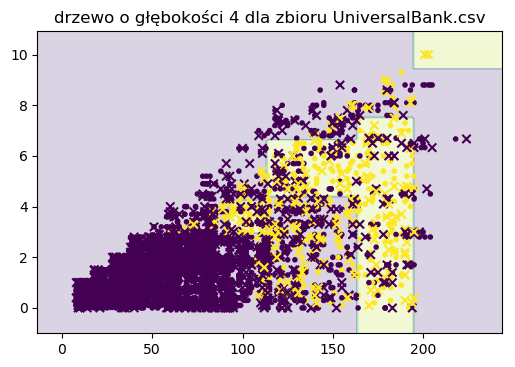

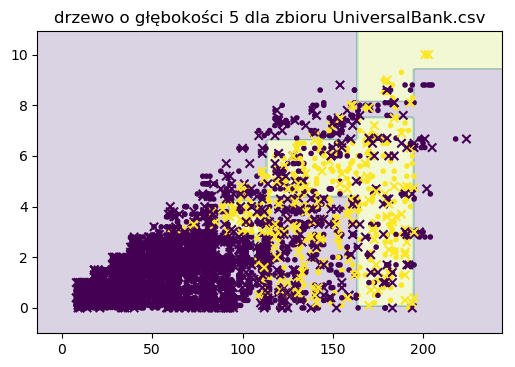

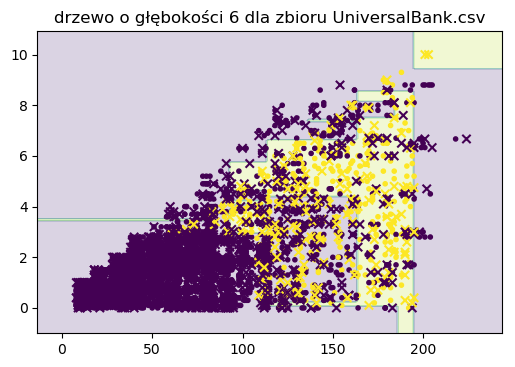

In [81]:
#Drzewa decyzyjne 
for g in [2,3,4,5,6]:
    drzewo = tree.DecisionTreeClassifier(max_depth=g)
    tekst = "drzewo o głębokości " + str(g) + " dla zbioru " + nazwa_pliku
    granice(drzewo ,d,0,1,tekst)